3 To - Do - Task

Please Complete all the problem listed below.
3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week 2 AI Datasets /bank .csv')

# Get DataFrame info
df.info()

# Columns with dtype=object
object_columns = df.select_dtypes(include='object').columns
print("Columns with dtype=object:", object_columns)

# Unique values in object columns
for col in object_columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

# Check for null values in each column
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# Drop object columns
numeric_df = df.drop(columns=object_columns)

# Save numeric data to a CSV file
numeric_df.to_csv('banknumericdata.csv', index=False)

# Load the new numeric dataset
numeric_df = pd.read_csv('banknumericdata.csv')

# Summary statistics
summary_stats = numeric_df.describe()
print("Summary statistics:\n", summary_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'con

Problem 2 - Data Imputations:

Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week 2 AI Datasets /medical_students_dataset.csv')

# Get DataFrame info
df.info()

# Identify columns with missing (null) values
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

# Example of handling missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':  # Categorical
            df[column].fillna(df[column].mode()[0], inplace=True)
            print(f"Filled missing values in '{column}' with mode.")
        else:  # Numerical
            # Choose mean or median
            if df[column].skew() < 1:  # Low skewness
                df[column].fillna(df[column].mean(), inplace=True)
                print(f"Filled missing values in '{column}' with mean.")
            else:  # High skewness
                df[column].fillna(df[column].median(), inplace=True)
                print(f"Filled missing values in '{column}' with median.")

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20

<ipython-input-4-28c9c0d18f40>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-4-28c9c0d18f40>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Filled missing values in 'Diabetes' with mode.
Filled missing values in 'Smoking' with mode.
Number of duplicate rows: 12572
Duplicates removed.


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [7]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Week 2 AI Datasets /Titanic-Dataset.csv')

# Subset for specific columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter rows where Pclass is 1
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate mean, median, max, and min for Fare
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Display the results
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")



Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [8]:
# Count null values in the 'Age' column
null_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_count}")

# Drop rows where 'Age' is null
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

# Verify the result
new_null_count = first_class_df_cleaned['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column after dropping: {new_null_count}")


Number of null values in the 'Age' column: 30
Number of null values in the 'Age' column after dropping: 0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [9]:
# Perform one-hot encoding on the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the one-hot encoded columns to the DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column
df.drop(columns=['Embarked'], inplace=True)

# Display the first few rows of the modified DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.


Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-10-dda042a08afe>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette='viridis')


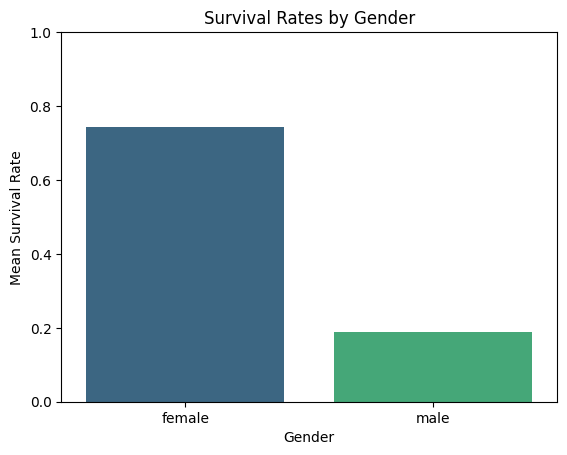

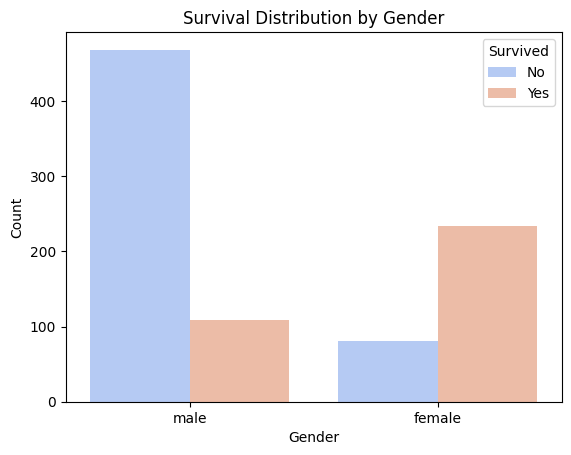

In [10]:
# Group by 'Sex' and calculate mean survival rate
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(mean_survival_by_gender)

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of mean survival rates by gender
sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette='viridis')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.title('Survival Rates by Gender')
plt.ylim(0, 1)  # Survival rates range from 0 to 1
plt.show()

sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Distribution by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

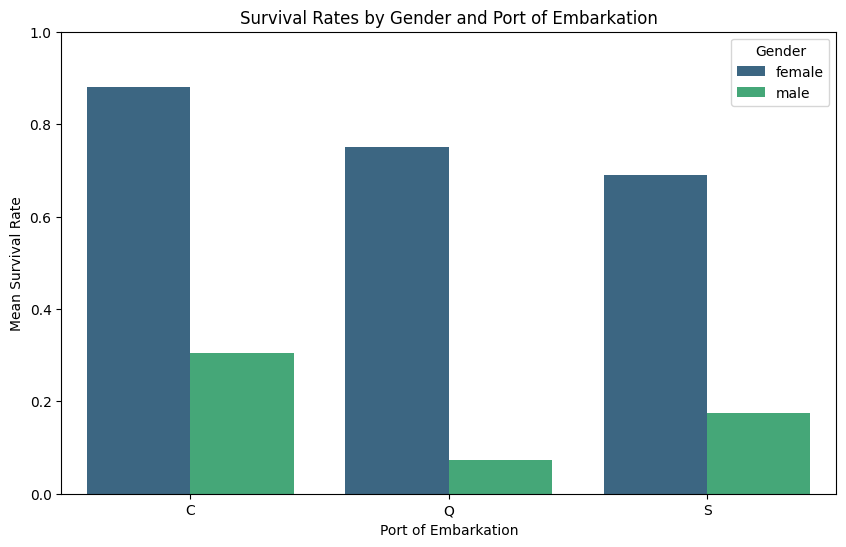

In [11]:
# Calculate mean survival rates by 'Sex' and 'Embarked'
mean_survival_by_sex_embarked = df.groupby(['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])['Survived'].mean().reset_index()

# Decode Embarked one-hot encoding back to a single column (if one-hot encoding was applied earlier)
df['Embarked'] = df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1).str[-1]
mean_survival_by_sex_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_survival_by_sex_embarked,
    x='Embarked',
    y='Survived',
    hue='Sex',
    palette='viridis'
)

# Add labels and title
plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.title('Survival Rates by Gender and Port of Embarkation')
plt.ylim(0, 1)  # Survival rates range from 0 to 1
plt.legend(title='Gender')
plt.show()


Problem - 6{Optional}:

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-16-5b963b6db656>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()
<ipython-input-16-5b963b6db656>:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = survival_by_class_age.pivot_table(index='Pclass', columns='AgeGroup', values='Survived')


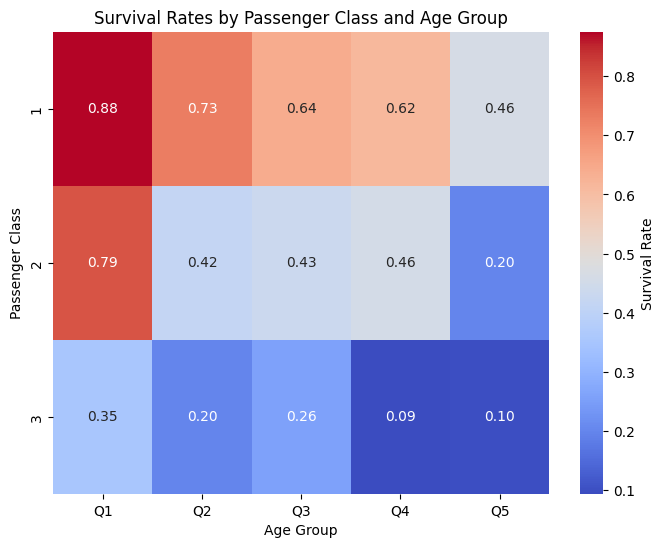

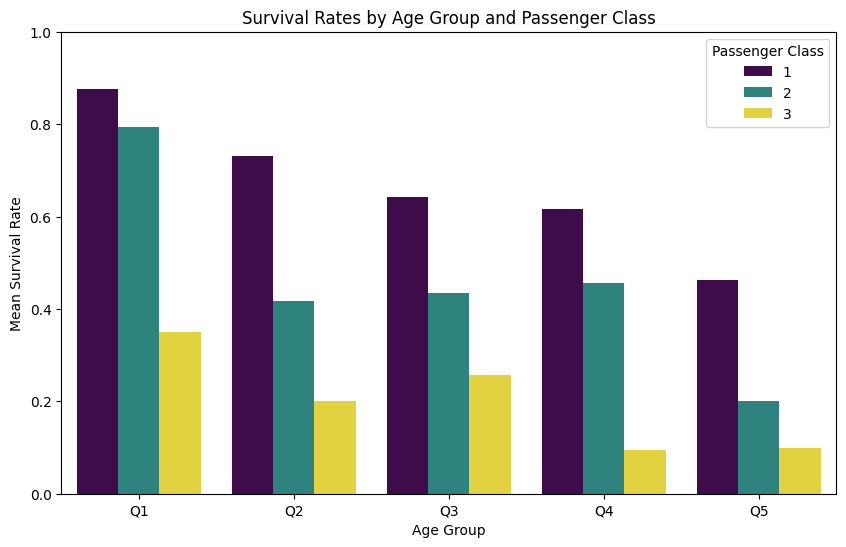

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fill missing values in 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Define custom bins for Age
bins = [0, 18, 25, 35, 50, 80]  # Adjust as needed
labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# Use pd.cut to create Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)


# Calculate mean survival rates
survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()

# Ensure AgeGroup is properly ordered
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], ordered=True)

# Pivot table for heatmap
pivot_table = survival_by_class_age.pivot_table(index='Pclass', columns='AgeGroup', values='Survived')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Survival Rate'}, fmt=".2f")
plt.xlabel('Age Group')
plt.ylabel('Passenger Class')
plt.title('Survival Rates by Passenger Class and Age Group')
plt.show()

# Visualization with grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_by_class_age, x='AgeGroup', y='Survived', hue='Pclass', palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Mean Survival Rate')
plt.title('Survival Rates by Age Group and Passenger Class')
plt.ylim(0, 1)
plt.legend(title='Passenger Class')
plt.show()
